In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.display.max_columns = None

In [134]:
df = pd.read_pickle('clean_data.pkl')

In [135]:
df.drop(columns=['Código Fincaraíz'], inplace=True)

In [136]:
df.drop(columns=['Estado'], inplace=True)

In [137]:
df = df.drop(index=df[df['Precio (COP)'].isna()].index)

In [138]:
df.drop(columns=['Piso N°'], inplace=True)

In [139]:
df.drop(columns=['Parqueaderos'], inplace=True)

In [140]:
df.drop(columns=['Características', 'Fecha Sacada', 'Descripción general', 'Dirección'], inplace=True)

In [141]:
df.dropna()

,Tipo,Propiedad,Acción,Habitaciones,Baños,Área construída,Área privada,Estrato,Antigüedad,Administración,Precio m²,Barrio,Ciudad,Departamento,Precio (COP),No. Fotos,Enlace,Acceso Pavimentado,Ascensor,Balcón,Barra estilo americano,Baño Auxiliar,Baño Independiente,Calentador,Canchas Deportivas,Circuito cerrado de TV,Citófono,Closet,Cocina Integral,Colegios / Universidades,En conjunto cerrado,Garaje / Parqueadero(s),Garaje(s),Instalación de gas,Jardín,Parqueadero Visitantes,Piscina,Portería / Recepción,Trans. Público cercano,Zona de lavandería
22,Usado,Apartamento,venta,4.0,4.0,107.0,0.0,4,9 a 15 años,0.0,5.233645e+09,El plan,Bogotá,"Bogotá, d.c.",560000000000,19,https://www.fincaraiz.com.co/inmueble/apartame...,0,1,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0
25,Usado,Apartamento,venta,3.0,3.0,145.0,0.0,5,9 a 15 años,379000.0,4.896552e+06,El plan,Bogotá,"Bogotá, d.c.",710000000,20,https://www.fincaraiz.com.co/inmueble/apartame...,0,1,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0
26,Usado,Apartamento,venta,2.0,1.0,72.0,72.0,4,1 a 8 años,290000.0,5.972222e+06,El plan,Bogotá,"Bogotá, d.c.",430000000,13,https://www.fincaraiz.com.co/inmueble/apartame...,0,1,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0
29,Usado,Apartamento,venta,3.0,1.0,49.0,0.0,4,16 a 30 años,160000.0,5.510204e+06,El plan,Bogotá,"Bogotá, d.c.",270000000,9,https://www.fincaraiz.com.co/inmueble/apartame...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30,Usado,Apartamento,venta,3.0,2.0,80.0,72.0,4,9 a 15 años,0.0,5.250000e+06,El plan,Bogotá,"Bogotá, d.c.",420000000,19,https://www.fincaraiz.com.co/inmueble/apartame...,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Inmobiliaria,Casa,venta,4.0,3.0,114.0,114.0,4,9 a 15 años,246000.0,5.482456e+06,Fusagasugá,Fusagasugá,Cundinamarca,625000000,20,https://www.fincaraiz.com.co/inmueble/casa-en-...,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0
796,Inmobiliaria,Casa,venta,3.0,3.0,101.0,0.0,3,1 a 8 años,170000.0,2.821782e+06,FUSAGASUGA,Fusagasugá,Cundinamarca,285000000,18,https://www.fincaraiz.com.co/inmueble/casa-en-...,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1
797,Inmobiliaria,Casa,venta,4.0,3.0,114.0,114.0,4,9 a 15 años,247000.0,5.482456e+06,FUSAGASUGA,Fusagasugá,Cundinamarca,625000000,14,https://www.fincaraiz.com.co/inmueble/casa-en-...,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,1,1,1,0,0,0
798,Loft,Apartamento,venta,3.0,2.0,51.0,51.0,3,1 a 8 años,0.0,5.254902e+06,FUSAGASUGA,Fusagasugá,Cundinamarca,268000000,5,https://www.fincaraiz.com.co/inmueble/apartame...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1


In [142]:
final_df = df.dropna().reset_index()

In [143]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in final_df.select_dtypes('object').columns:
    print(col)
    final_df[col] = le.fit_transform(final_df[col])

Tipo
Propiedad
Acción
Estrato
Antigüedad
Barrio
Ciudad
Departamento
Precio (COP)
No. Fotos
Enlace


In [161]:
final_df['Precio (COP)'] = final_df['Precio (COP)'].astype('int64')

0      122000000
1      139000000
2       98000000
3       59000000
4       95000000
         ...    
482    131000000
483     63000000
484    131000000
485     58000000
486     91000000
Name: Precio (COP), Length: 487, dtype: int32

In [144]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     487 non-null    int64  
 1   Tipo                      487 non-null    int32  
 2   Propiedad                 487 non-null    int32  
 3   Acción                    487 non-null    int32  
 4   Habitaciones              487 non-null    float64
 5   Baños                     487 non-null    float64
 6   Área construída           487 non-null    float64
 7   Área privada              487 non-null    float64
 8   Estrato                   487 non-null    int32  
 9   Antigüedad                487 non-null    int32  
 10  Administración            487 non-null    float64
 11  Precio m²                 487 non-null    float64
 12  Barrio                    487 non-null    int32  
 13  Ciudad                    487 non-null    int32  
 14  Departamen

In [145]:
final_df.drop(columns='index', inplace=True)
final_df['Precio (COP)'] = final_df['Precio (COP)'] * 1000

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
final_df.loc[34]

Tipo                              6.00
Propiedad                         0.00
Acción                            0.00
Habitaciones                      2.00
Baños                             1.00
Área construída                  46.00
Área privada                     42.00
Estrato                           2.00
Antigüedad                        0.00
Administración               100000.00
Precio m²                   4304347.83
Barrio                           96.00
Ciudad                            1.00
Departamento                      1.00
Precio (COP)                  38000.00
No. Fotos                        10.00
Enlace                          142.00
Acceso Pavimentado                0.00
Ascensor                          1.00
Balcón                            0.00
Barra estilo americano            1.00
Baño Auxiliar                     0.00
Baño Independiente                0.00
Calentador                        0.00
Canchas Deportivas                0.00
Circuito cerrado de TV   

In [148]:
X = final_df.drop('Precio (COP)', axis=1)
y = final_df['Precio (COP)']

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)

In [150]:
final_df['Precio (COP)'] = final_df['Precio (COP)'] * 1000

In [151]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [152]:
predicted = lr.predict(X_test)

In [153]:
for col, coef in zip(final_df.drop('Precio (COP)', axis=1).columns, lr.coef_):
    print(col, coef)

Tipo -1240.9865666548205
Propiedad 50803.43405585277
Acción -5.5653219670215304e-05
Habitaciones 860.898437292215
Baños 4667.157518276132
Área construída -39.85780742222304
Área privada -9.43595375867505
Estrato 5343.347686938631
Antigüedad -3236.0121991951282
Administración 0.01858113205313039
Precio m² 4.138193617109209e-06
Barrio 10.653909253820583
Ciudad 1121.3067146019202
Departamento -4474.557751382732
No. Fotos -364.9268827491801
Enlace -100.69062630182817
Acceso Pavimentado -3561.4358376254486
Ascensor 9228.702371643843
Balcón 1568.805938696485
Barra estilo americano -4433.477944495938
Baño Auxiliar 4177.656718521463
Baño Independiente 6757.393907165739
Calentador 13645.433103992726
Canchas Deportivas -4338.767551680936
Circuito cerrado de TV 1113.9497137485328
Citófono 3109.8809194640617
Closet -2571.575210366821
Cocina Integral 1438.2605225984519
Colegios / Universidades -6883.743196668009
En conjunto cerrado -8890.168313142798
Garaje / Parqueadero(s) -5711.143504578759
Garaj

In [154]:
lr.coef_

array([-1.24098657e+03,  5.08034341e+04, -5.56532197e-05,  8.60898437e+02,
        4.66715752e+03, -3.98578074e+01, -9.43595376e+00,  5.34334769e+03,
       -3.23601220e+03,  1.85811321e-02,  4.13819362e-06,  1.06539093e+01,
        1.12130671e+03, -4.47455775e+03, -3.64926883e+02, -1.00690626e+02,
       -3.56143584e+03,  9.22870237e+03,  1.56880594e+03, -4.43347794e+03,
        4.17765672e+03,  6.75739391e+03,  1.36454331e+04, -4.33876755e+03,
        1.11394971e+03,  3.10988092e+03, -2.57157521e+03,  1.43826052e+03,
       -6.88374320e+03, -8.89016831e+03, -5.71114350e+03,  1.62818462e+04,
       -1.10267958e+04, -1.34054617e+04, -8.26346668e+02,  2.64151874e+02,
        4.40140519e+03, -1.54411162e+04,  6.73673418e+03])

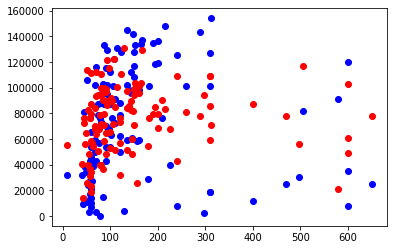

In [155]:
plt.scatter(x=X_test['Área construída'], y=y_test, color='blue')
plt.scatter(x=X_test['Área construída'], y=predicted, color='red')

In [156]:
X_test['Actual Price'] = y_test

In [157]:
X_test['Predicted Price'] = predicted

In [158]:
X_test.head(20)

,Tipo,Propiedad,Acción,Habitaciones,Baños,Área construída,Área privada,Estrato,Antigüedad,Administración,Precio m²,Barrio,Ciudad,Departamento,No. Fotos,Enlace,Acceso Pavimentado,Ascensor,Balcón,Barra estilo americano,Baño Auxiliar,Baño Independiente,Calentador,Canchas Deportivas,Circuito cerrado de TV,Citófono,Closet,Cocina Integral,Colegios / Universidades,En conjunto cerrado,Garaje / Parqueadero(s),Garaje(s),Instalación de gas,Jardín,Parqueadero Visitantes,Piscina,Portería / Recepción,Trans. Público cercano,Zona de lavandería,Actual Price,Predicted Price
147,1,1,0,4.0,4.0,143.0,0.0,3,0,0.0,3566433.57,14,5,3,5,248,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,112000,82666.356013
139,1,1,0,4.0,3.0,86.0,50.0,5,1,513000.0,4418604.65,174,5,3,21,337,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,87000,99487.495296
164,1,1,0,6.0,7.0,298.0,298.0,4,2,464000.0,3556995.88,152,6,4,10,407,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,2000,93975.636973
408,6,1,0,6.0,3.0,156.0,156.0,2,4,0.0,1717948.72,37,2,6,10,290,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,58000,25706.273311
201,1,1,0,5.0,6.0,310.0,1.0,5,3,466000.0,4838709.68,182,6,4,15,413,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,19000,109075.640738
233,1,0,0,2.0,1.0,57.0,55.0,2,0,100000.0,2982456.14,147,6,4,2,223,0,1,1,0,0,0,0,0,1,1,0,1,0,1,0,0,1,1,1,1,1,0,1,27000,36365.878756
213,1,0,0,2.0,3.0,60.0,60.0,3,0,0.0,4166666.67,17,6,4,26,20,0,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,54000,79449.251372
171,1,0,0,4.0,5.0,226.0,226.0,5,0,0.0,8849557.52,182,6,4,4,234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40000,67425.315088
34,6,0,0,2.0,1.0,46.0,42.0,2,0,100000.0,4304347.83,96,1,1,10,142,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,0,38000,55698.142718
320,1,1,0,4.0,4.0,240.0,0.0,4,1,0.0,5000000.00,122,4,0,1,368,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8000,109159.437516
